In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
# inspect first data
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).

In [4]:
target_variable = data['charges']
features = data[['age', 'bmi']]

2. Split the dataset into training (train) and testing (test) data with an appropriate proportion.

In [5]:
from sklearn.model_selection import train_test_split

test_size = 0.2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=test_size, random_state=42)

# The 'random_state' parameter ensures reproducibility. You can use any integer value.

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1070, 2)
X_test shape: (268, 2)
y_train shape: (1070,)
y_test shape: (268,)


3. Create a multiple linear regression model using Scikit-Learn.

In [6]:
X = pd.get_dummies(data, columns=['smoker'], drop_first=True)

In [7]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

4. Train the model on the training data and make predictions on the testing data.

In [8]:
y_pred = model.predict(X_test)

5. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

Mean Absolute Error: 9222.664535238679
Mean Squared Error: 131440262.76073726
R-squared (R2) Score: 0.1533569292467798


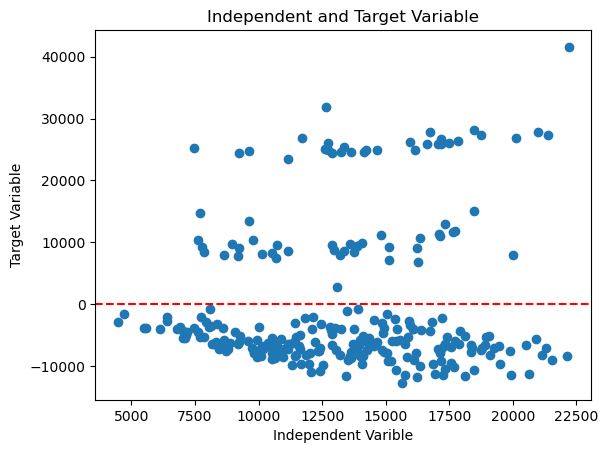

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.xlabel("Independent Varible")
plt.ylabel("Target Variable")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Independent and Target Variable")
plt.show()